# 0.0 Imports


In [39]:
import pandas as pd
import seaborn as sns


## 0.1 loading data

In [4]:
df_raw = pd.read_csv(r"C:\Users\alexandre.fonseca\Documents\repos\tcc\data\FPM-por-Municipio.csv", sep=';',encoding="latin1")


## 0.2 Helper Functions

# 1.0 Data Description

In [6]:
df1 = df_raw.copy()

## 1.1 rename columns

In [9]:
df1.columns  = ['codigo', 'municipio', 'uf', 'municipio_uf', 'mes', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025']

## 1.2 Data Dimensions

In [10]:
print(" Number of rows {}".format( df1.shape[0] ) )
print(" Number of cols {}".format( df1.shape[1] ) )

 Number of rows 66848
 Number of cols 35


## 1.3 Data Types

In [11]:
df1.dtypes


codigo          float64
municipio        object
uf               object
municipio_uf     object
mes             float64
1996             object
1997             object
1998             object
1999             object
2000             object
2001             object
2002             object
2003             object
2004             object
2005             object
2006             object
2007             object
2008             object
2009             object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
2020             object
2021             object
2022             object
2023             object
2024             object
2025             object
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()


codigo          8
municipio       8
uf              8
municipio_uf    8
mes             8
1996            8
1997            8
1998            8
1999            8
2000            8
2001            8
2002            8
2003            8
2004            8
2005            8
2006            8
2007            8
2008            8
2009            8
2010            8
2011            8
2012            8
2013            8
2014            8
2015            8
2016            8
2017            8
2018            8
2019            8
2020            8
2021            8
2022            8
2023            8
2024            8
2025            8
dtype: int64

# 2.0 Data Engineering

In [21]:
df2 = df1.copy()


## 2.1 Data filtering

In [22]:
CODIGO_CATALAO = 9301

df2 = df2[df2['codigo'] == CODIGO_CATALAO]


## 2.2 remove cols

In [23]:
cols_to_remove = ['municipio', 'municipio_uf']
df2 = df2.drop(cols_to_remove, axis=1)

,codigo,uf,mes,1996,1997,1998,1999,2000,2001,2002,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
11280,9301.0,GO,1.0,"260.380,68","359.885,49","351.045,01","347.137,93","363.627,34","508.968,22","545.617,00",...,"2.267.824,25","2.424.133,28","2.726.430,13","3.305.446,43","2.997.020,25","3.589.895,77","4.364.822,17","4.933.620,37","5.426.484,36","6.115.437,63"
11281,9301.0,GO,2.0,"264.623,42","268.349,96","324.591,85","355.138,16","330.570,07","414.703,97","638.515,02",...,"2.838.988,08","3.107.673,66","3.564.296,88","3.630.834,98","4.330.560,47","4.705.443,16","6.092.923,69","6.597.339,13","7.378.667,37","8.206.211,16"
11282,9301.0,GO,3.0,"229.935,32","244.747,19","274.956,47","364.936,99","360.107,57","361.404,63","488.645,35",...,"1.724.454,18","1.947.147,97","2.400.165,25","2.718.562,60","2.532.198,57","3.153.959,68","3.693.777,57","4.035.894,99","4.600.194,43","5.404.167,60"
11283,9301.0,GO,4.0,"405.094,47","306.919,11","343.212,20","329.996,68","373.508,65","413.275,31","510.352,87",...,"2.050.005,66","2.345.982,23","2.516.495,07","2.652.257,05","2.482.115,16","3.297.225,87","4.378.434,37","4.614.287,46","4.824.931,28","5.491.556,43"
11284,9301.0,GO,5.0,"260.597,71","313.220,76","311.992,59","357.357,79","357.255,24","464.667,40","584.923,03",...,"2.726.012,73","2.661.111,93","3.088.350,83","3.403.709,75","2.593.248,44","3.962.811,47","4.870.571,31","5.129.521,30","5.613.192,41",-


## 2.3 Data engineering

In [24]:
## 2.4 Melt dos dados
# Criando lista de colunas de anos
anos = [str(ano) for ano in range(1996, 2026)]

# Fazendo o melt dos dados
df2 = pd.melt(df2, 
              id_vars=['codigo', 'uf', 'mes'],
              value_vars=anos,
              var_name='ano',
              value_name='valor')

# Convertendo o ano para inteiro
df2['ano'] = df2['ano'].astype(int)

In [28]:
df2 = df2[df2['valor'] != ' -   ']

In [31]:
# Convertendo o valor para float (removendo pontos e vírgulas)
df2['valor'] = df2['valor'].str.replace('.', '').str.replace(',', '.').astype(float)

In [34]:
df2["mes"] = df2["mes"].astype(int)

In [36]:
# Ordenando os dados
df2 = df2.sort_values(['ano', 'mes'])

# 3.0 Exploratory Data Analysis


In [40]:
df3 = df2.copy()


##  3.1 Univariate Analysis

### 3.1.1 Response Variable

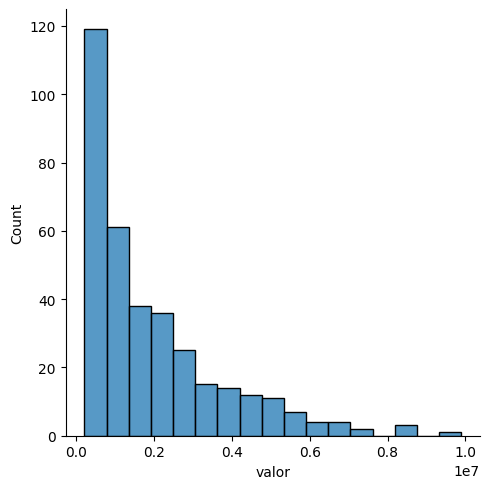

In [41]:
sns.displot(df3["valor"])

Observações: 
- Distribuição de cauda longa para a variável que queremos prever